In [1]:
#Python Packages
import pandas as pd
import numpy as np
import xarray as xr
import glob as gb 
import csv
import itertools
from pathlib import Path
from pandas import *
import os.path
import matplotlib.pyplot as plt

In [2]:
#Load in functions from freelymoving ephys
import sys
sys.path.insert(0, 'C:/Users/Niell Lab/Documents/GitHub/FreelyMovingEphys')
#from utils.paths import find
from utils.time import open_time1
from utils.time import open_time
from utils.format_data import open_h5
from utils.format_data import open_ma_h5

#function to get correct frame in case there's lag in the acquisition
def find_first(item, vec):
    return np.argmin(np.abs(vec-item))

In [3]:
##Load Data
# Dictionary of columns in data frame
data_dict = {'date': [],
             'animal': [],
             'task': [],             
             'poke1_ts':[],
             'poke2_ts': [],
             #'spout1_ts': [],
             #'spout2_ts': [],
             'top1_ts': [],
             'poke1_t0':[],
             'poke2_t0': [],
             #'spout1_t0': [],
             #'spout2_t0': [],
             'top1_t0': []}
# List of dates for analysis
dates= ['102121' ,'102621','103021','110121','110221','110321','111021','111121', '111221']
data_path = Path('T:/Mike/kana_gd/recordings').expanduser()
all_paths = []
#Populate Data Dict with meta data and timestamps   
for date in dates:
    for ani in os.listdir(data_path / date): 
        for task in os.listdir(data_path / date/ ani):
            data_paths = list((data_path / date/ ani/ task).rglob('*.csv'))
            if data_paths != []:
                    data_dict['date'].append(data_paths[1].name.split('_')[0])
                    data_dict['animal'].append(data_paths[1].name.split('_')[1])
                    data_dict['task'].append(data_paths[1].name.split('_')[4])
            for ind, csv in enumerate(data_paths):
                data_dict[data_paths[ind].name.split('_')[5] +'_ts'].append(open_time(csv))
                data_dict[data_paths[ind].name.split('_')[5] +'_t0'].append(open_time(csv)[0])
df = pd.DataFrame(data_dict)


In [4]:
df

,date,animal,task,poke1_ts,poke2_ts,top1_ts,poke1_t0,poke2_t0,top1_t0
0,102121,G6CK3LT,gd,"[30660.522483, 30756.048601, 30766.584793, 307...","[30748.749312, 30760.52224, 30772.635225, 3078...","[30659.3824, 30659.398835, 30659.420352, 30659...",30660.522483,30748.749312,30659.382400
1,102121,G6CK3RT,gd,"[29381.797977, 29401.095667, 29416.940262, 294...","[29395.815564, 29408.755827, 29423.764876, 294...","[29380.669465, 29380.684774, 29380.70135, 2938...",29381.797977,29395.815564,29380.669465
2,102621,G6CK3LT,gd,"[43821.988249, 43835.088115, 43844.153433, 438...","[43827.538841, 43838.742182, 43856.737356, 438...","[43820.86336, 43820.879513, 43820.896025, 4382...",43821.988249,43827.538841,43820.863360
3,102621,G6CK3RT,gd,"[44938.068492, 44960.938163, 44969.327244, 449...","[44950.045964, 44963.994035, 44972.305395, 449...","[44936.977843, 44936.989516, 44937.006156, 449...",44938.068492,44950.045964,44936.977843
4,103021,G6CK3LT,gddark,"[56323.944435, 56343.09911, 56359.111116, 5637...","[56331.616819, 56350.17824, 56361.986944, 5637...","[56322.851584, 56322.866099, 56322.882764, 563...",56323.944435,56331.616819,56322.851584
5,103021,G6CK3RT,gddark,"[54057.776204, 54093.078144, 54105.412275, 541...","[54083.517068, 54097.485811, 54108.464, 54116....","[54056.742617, 54056.755392, 54056.77207, 5405...",54057.776204,54083.517068,54056.742617
6,103021,G6CK3RT,gddark2,"[55471.495372, 55491.923609, 55500.292416, 555...","[55485.988249, 55494.934425, 55503.020531, 555...","[55470.408704, 55470.42382, 55470.442304, 5547...",55471.495372,55485.988249,55470.408704
7,110121,G6CK3LT,gd,"[54799.050214, 54816.398195, 54830.497728, 548...","[54810.442393, 54819.445785, 54833.443289, 548...","[54797.850048, 54797.865766, 54797.882252, 547...",54799.050214,54810.442393,54797.850048
8,110121,G6CK3RT,gd,"[55607.808038, 55619.011136, 55626.679398, 556...","[55613.706496, 55621.370636, 55628.944716, 556...","[55606.691852, 55606.707366, 55606.724057, 556...",55607.808038,55613.706496,55606.691852
9,110221,G6CK3LT,gddark,"[62978.855142, 63069.735936, 63119.760307, 631...","[62993.994995, 63084.29847, 63123.89376, 63134...","[62977.785868, 62977.802176, 62977.820249, 629...",62978.855142,62993.994995,62977.785868


In [5]:
#Align to 
df.poke1_ts = df.poke1_ts - df.top1_t0
df.poke2_ts = df.poke2_ts - df.top1_t0
df.top1_ts = df.top1_ts - df.top1_t0 
#df.spout1_ts = df.spout1_ts - df.top1_t0
#df.spout2_ts = df.spout2_ts - df.top1_t0

In [6]:
#Get all pokes_ts
pokes_ts = []
for ind, row in df.iterrows():
    x = row['poke1_ts'].astype(str).astype(float)
    y = row['poke2_ts'].astype(str).astype(float)
    z = list(itertools.chain(x,y)) 
    z = sorted(z)
    pokes_ts.append(z)
df['pokes_ts'] = pokes_ts

In [7]:
# Number of pokes 
pokes = []
for ind, row in df.iterrows():
    x = row['pokes_ts']
    x=len(x)
    pokes.append(x)
df['poke_num'] = pokes

In [8]:
# Time between pokes in sec
time_between_pokes = []
for ind, row in df.iterrows():
    g = row['pokes_ts']
    g = np.diff(g)
    g = np.where(g>20, np.NaN, g)
    time_between_pokes.append(g)
df['time_between_pokes'] = time_between_pokes


In [9]:
#Get 'trials'
## add 
trial_ts = []
for ind, row in df.iterrows():
    x = row['pokes_ts']#.astype(str).astype(float)
    y = [x[i:i+2] for i in range(0, len(x), 2)]
    z =  [x[i+1:i+3] for i in range(0, len(x), 2)]
    t = sorted(y+z)
    trial_ts.append(t)
df['trial_ts']= trial_ts


In [10]:
#Get 'trials #'
trial_num = []
for ind, row in df.iterrows():
    x = row['trial_ts']#.astype(str).astype(float)
    y=len(x)
    trial_num.append(y)
df['trial_num']= trial_num 

In [11]:
# time
time = []
for ind, row in df.iterrows():
    x = row['top1_ts']
    y=len(x)
    y=y/60
    time.append(y)
df['time'] = time

In [12]:
# time/trials
avg_t_trial = []
for ind, row in df.iterrows():
    x = row['time']/row['trial_num']
    avg_t_trial.append(x)
df['avg_t_trial'] = avg_t_trial

In [13]:
# avg_trial_poke
avg_trial_poke = []
for ind, row in df.iterrows():
    x = np.nanmean(row['time_between_pokes'])
    avg_trial_poke.append(x)
df['avg_trial_poke'] = avg_trial_poke

In [14]:
animals =[]
for i, g in df.groupby('animal'):
    globals()['df_' + str(i)] =  g
    g =g.reset_index(drop=True, inplace=True)
    animals.append(i)
    


In [15]:
animals

['G6CK3LT', 'G6CK3RT']

In [16]:
df_G6CK3RT

,date,animal,task,poke1_ts,poke2_ts,top1_ts,poke1_t0,poke2_t0,top1_t0,pokes_ts,poke_num,time_between_pokes,trial_ts,trial_num,time,avg_t_trial,avg_trial_poke
0,102121,G6CK3RT,gd,"[1.1285119999993185, 20.426202000002377, 36.27...","[15.146099000001414, 28.086362000001827, 43.09...","[0.0, 0.015309000002162065, 0.0318850000003294...",29381.797977,29395.815564,29380.669465,"[1.1285119999993185, 15.146099000001414, 20.42...",160,"[14.017587000002095, 5.280103000000963, 7.6601...","[[1.1285119999993185, 15.146099000001414], [15...",160,1004.266667,6.276667,5.115151
1,102621,G6CK3RT,gd,"[1.0906489999979385, 23.96031999999832, 32.349...","[13.068120999996609, 27.016192000002775, 35.32...","[0.0, 0.011673000000882894, 0.0283130000025266...",44938.068492,44950.045964,44936.977843,"[1.0906489999979385, 13.068120999996609, 23.96...",156,"[11.97747199999867, 10.89219900000171, 3.05587...","[[1.0906489999979385, 13.068120999996609], [13...",156,1047.550000,6.715064,4.826031
2,103021,G6CK3RT,gddark,"[1.0335869999980787, 36.335526999995636, 48.66...","[26.774450999997498, 40.74319399999513, 51.721...","[0.0, 0.0127749999955995, 0.02945299999555573,...",54057.776204,54083.517068,54056.742617,"[1.0335869999980787, 26.774450999997498, 36.33...",93,"[nan, 9.561075999998138, 4.407666999999492, 7....","[[], [1.0335869999980787, 26.774450999997498],...",94,489.183333,5.204078,5.055542
3,103021,G6CK3RT,gddark2,"[1.0866679999962798, 21.51490499999636, 29.883...","[15.579545000000508, 24.525720999998157, 32.61...","[0.0, 0.015116000002308283, 0.0335999999952036...",55471.495372,55485.988249,55470.408704,"[1.0866679999962798, 15.579545000000508, 21.51...",70,"[14.492877000004228, 5.935359999995853, 3.0108...","[[1.0866679999962798, 15.579545000000508], [15...",70,641.350000,9.162143,5.264539
4,110121,G6CK3RT,gd,"[1.1161859999992885, 12.319283999997424, 19.98...","[7.0146439999953145, 14.678783999996085, 22.25...","[0.0, 0.01551399999880232, 0.03220499999588355...",55607.808038,55613.706496,55606.691852,"[1.1161859999992885, 7.0146439999953145, 12.31...",139,"[5.898457999996026, 5.3046400000021094, 2.3594...","[[], [1.1161859999992885, 7.0146439999953145],...",140,666.300000,4.759286,4.625815
5,110221,G6CK3RT,gddark,"[1.1339260000022477, 14.881330999996862, 25.33...","[7.257881999998062, 17.564274999996996, 27.731...","[0.0, 0.015257999999448657, 0.0319099999978789...",65286.473420,65292.597376,65285.339494,"[1.1339260000022477, 7.257881999998062, 14.881...",141,"[6.123955999995815, 7.6234489999988, 2.6829440...","[[], [1.1339260000022477, 7.257881999998062], ...",142,752.516667,5.299413,5.229003
6,110321,G6CK3RT,gddark,"[1.1335429999962798, 22.56537599999865, 35.825...","[15.34367999999813, 26.403583999999682, 38.561...","[0.0, 0.016460999999253545, 0.0331010000008973...",63316.977472,63331.187609,63315.843929,"[1.1335429999962798, 15.34367999999813, 22.565...",77,"[14.21013700000185, 7.22169600000052, 3.838208...","[[], [1.1335429999962798, 15.34367999999813], ...",78,417.350000,5.350641,5.473601
7,110321,G6CK3RT,gddark2,"[1.1342980000044918, 21.710118000002694, 31.71...","[15.995648000003712, 24.08591400000296, 34.461...","[0.0, 0.007808000002114568, 0.0245250000007217...",63946.209536,63961.070886,63945.075238,"[1.1342980000044918, 15.995648000003712, 21.71...",99,"[14.86134999999922, 5.7144699999989825, 2.3757...","[[], [1.1342980000044918, 15.995648000003712],...",100,722.083333,7.220833,6.079333
8,111021,G6CK3RT,gdwhsk,"[1.1024510000061127, 23.832883000002766, 33.18...","[15.77150700000493, 27.88824300000124, 38.6246...","[0.0, 0.00457000000460539, 0.02140200000576442...",47056.238681,47070.907737,47055.136230,"[1.1024510000061127, 15.77150700000493, 23.832...",130,"[14.669055999998818, 8.061375999997836, 4.0553...","[[1.1024510000061127, 15.77150700000493], [15....",130,790.666667,6.082051,5.222297
9,111121,G6CK3RT,gdwhsk2,"[1.1331839999984368, 30.585676999995485, 46.97...","[7.691212999998243, 36.426995000001625, 52.631...","[0.0, 0.01638400000

In [17]:
data = df
#create unique list of names
by_animal = data.animal.unique()

#create a data frame dictionary to store your data frames
DataFrameDict = {elem : pd.DataFrame for elem in by_animal}

for key in DataFrameDict.keys():
    DataFrameDict[key] = data[:][data.animal == key]

In [18]:
dflt = DataFrameDict['G6CK3LT']
dflt.reset_index(drop=True, inplace=True)
dfrt = DataFrameDict['G6CK3RT']
dfrt.reset_index(drop=True, inplace=True)

In [76]:
for df in [dfrt, dflt]:
    df.loc[(df['task'] == 'gddark2') | (df['task'] == 'gddark3'), 'task'] = 'gddark'
    df.loc[df['task'] == 'gdwhsk2', 'task'] = 'gdwhsk'   

In [77]:
 index = ('light', 'dark', 'light/no whiskers',
         'dark + no whiskers')
for df, mean in zip([dfrt, dflt], ['rt', 'lt']):
    locals()["mean"+ mean] = df.groupby('task')['avg_trial_poke'].mean()       

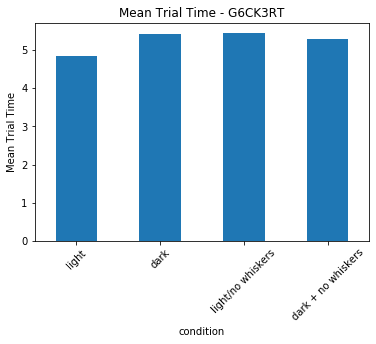

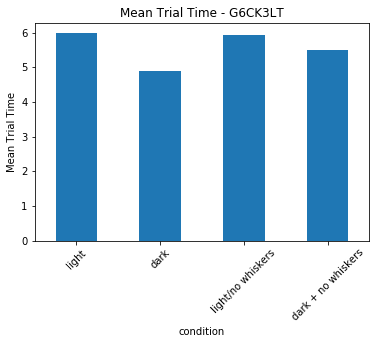

In [79]:
for means, ani in zip([meanrt, meanlt], ['RT', 'LT']):
    plt.figure()
    means.plot.bar(rot = 45)
    plt.xticks([0, 1, 2, 3], ["light", "dark", "light/no whiskers", "dark + no whiskers"])
    plt.xlabel('condition')
    plt.ylabel('Mean Trial Time')
    plt.title('Mean Trial Time - G6CK3' + ani)
    plt.show

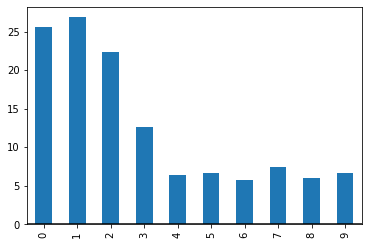

In [196]:
dfrt.avg_t_trial.plot.bar()

In [237]:
df1 = pd.concat([dflt['avg_t_trial'],dfrt['avg_t_trial'],dflt['trial_num'],dfrt['trial_num']],axis=1, keys=['lt_t_trial', 'rt_t_trial','lt_num_trial','rt_num_trial'])

df1['avg_t'] = df1[['lt_t_trial', 'rt_t_trial']].mean(axis=1)

df1['avg_num'] = df1[['lt_num_trial', 'rt_num_trial']].mean(axis=1)

In [238]:
df1

,lt_t_trial,rt_t_trial,lt_num_trial,rt_num_trial,avg_t,avg_num
0,25.580556,44.969524,48,70,35.275040,59.0
1,26.845056,43.666270,118,84,35.255663,101.0
2,22.350235,30.517105,142,114,26.433670,128.0
3,12.683937,9.225154,138,108,10.954546,123.0
4,6.372478,10.116935,152,124,8.244707,138.0
5,6.724625,6.074373,178,186,6.399499,182.0
6,5.807552,9.753704,128,126,7.780628,127.0
7,7.427178,4.984774,176,162,6.205976,169.0
8,5.971765,8.225444,170,150,7.098605,160.0
9,6.661894,5.620406,220,156,6.141150,188.0


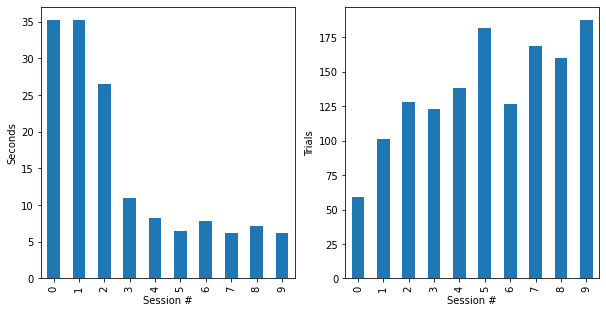

In [250]:

figure, axes = plt.subplots(1, 2, figsize= (10,5))
axes[0].set(xlabel="Session #", ylabel="Seconds")
axes[1].set(xlabel="Session #", ylabel="Trials")
df1['avg_t'].plot(ax=axes[0],kind='bar')
df1['avg_num'].plot(ax=axes[1],kind='bar')

plt.savefig('Avg performance')


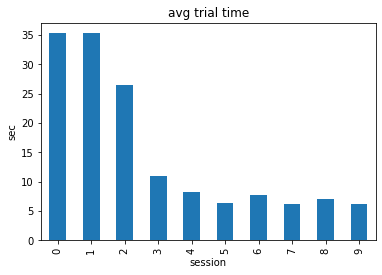

In [211]:
plt.figure()
plt.ylabel('sec')
plt.xlabel('session')
plt.title('avg trial time')
df1['avg'].plot.bar()
plt.savefig('avg trial time')


In [209]:
df2 = pd.concat([dflt['trial_num'],dfrt['trial_num']],axis=1, keys=['lt', 'rt'])
df2['avg'] = df2[['lt', 'rt']].mean(axis=1)

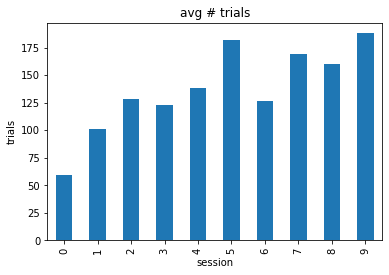

In [213]:
plt.figure()
plt.ylabel('trials')
plt.xlabel('session')
plt.title('avg # trials')
df2['avg'].plot.bar()
plt.savefig('avg trial number')